In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#check for duplicates in dataset
df.duplicated().sum()

1

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
#check for null values in dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

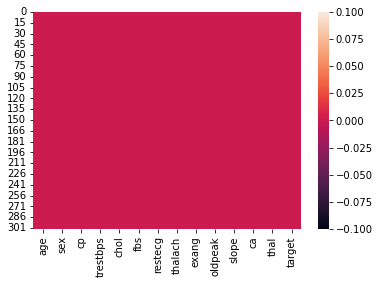

In [8]:
# Recheck the null values using heatmap for better clarification
sns.heatmap(df.isnull())
plt.show()

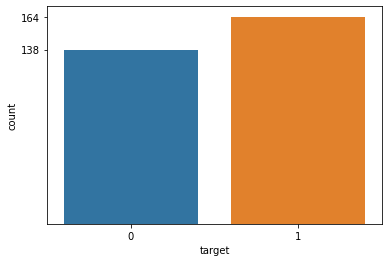

In [9]:
#check if output is unbalanced
# Visualize
sns.countplot(data=df,x='target')
f=df['target'].value_counts()
plt.yticks(f)
plt.show()

In [10]:
# Select input and output
X= df.drop('target',axis=1) # Select input
Y=df['target'] # Selct output

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [12]:
# Applying standard scaler on X_train and X_test
from sklearn.preprocessing import StandardScaler
# Create object of standard scaler class
ss= StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
#create a user defined function
def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [15]:
#Apply Support Vector Machine (SVM)
#SVM : Support vector machine 
#There are different types of SVM : -
'''
1. Linear Separatable data means Linear Kernal function
2.  Non -Linear data
1. Polynomial Kernal function    2. radial basis kernel function
'''

'\n1. Linear Separatable data means Linear Kernal function\n2.  Non -Linear data\n1. Polynomial Kernal function    2. radial basis kernel function\n'

In [16]:
#1. Linear Separable data means Linear Kernal
from sklearn.svm import LinearSVC 

In [17]:
svc=LinearSVC(random_state=1) #by default hard margin, supposing there are no outliers in dataset
#we are supposing that there is no overfitting issue

In [18]:
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.83      0.83      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[[29  9]
 [ 9 44]]


In [19]:
#here recall is 0.76 of 0 category which is good but we can more better
#means can be possible ,model is overfit  why 
#perhaps , can be no error on training time but error on testing time , 
#what  do we do ,
#add some external error during training time  if create a object of 
#LinearSVC class 

#Soft margin means to reduced overfitting situation means some error add on
#training time 
#create object of LinearSVC class
#Soft Margin

In [41]:
svc1=LinearSVC(random_state=1, C=0.9) #soft margin

#here C is parameter which is used to add some error during training

In [42]:
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.83      0.83      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[[29  9]
 [ 9 44]]


In [22]:
#no any effect on recall if error increase or decrease means we conclude ,
#data of bank set is not a linearly separateable means non-linearly data 
#Then use polynomial Kernel function : It is used for Non-Linearly data
#In polynomial Kernal function, increase the dimension means to increase low
#dimension to high dimension

In [23]:
# Use polynomial kernal function
from sklearn.svm import SVC

#svc used for polynomial and radial based kernal functions: both are used for non-linear function

In [24]:
#create object of SVC class and pass the poly in kernal parameter
svc1=SVC(random_state=1, kernel='poly')

In [25]:
#call function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        38
           1       0.84      0.87      0.85        53

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

[[29  9]
 [ 7 46]]


In [33]:
#score is still the same
#so give dataset in radial based function=rbf
svc2=SVC(random_state=1, kernel='rbf')

In [34]:
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.81      0.79      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91

[[28 10]
 [11 42]]


In [ ]:
#Conclusion: Through our analysis we found the best score through polynomial based kernal  function.
#The score for 0 class was 0.76 and for class 1 was 0.87.